The aim of this program is to create an interacting many body state by moving two single states together. This will then be compared to a many body state.

In [1]:
#Package imports

import iDEA as idea
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining x grid & interactions

x = np.linspace(-30,30,200)
v_int = idea.interactions.softened_interaction(x)

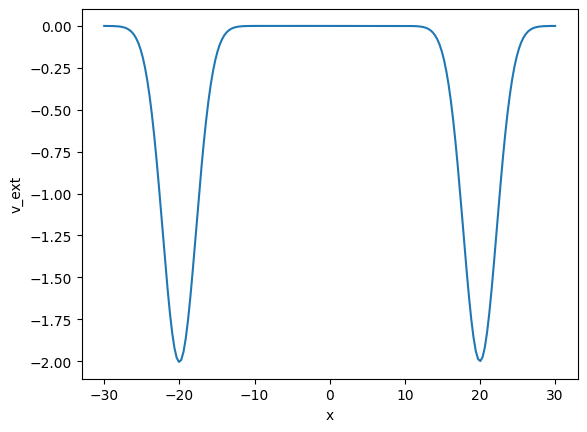

In [3]:
#Defining the external potential
#Two inverse gaussians
v_ext = -2*np.exp(-((x-20)**2)/10) - 2.005*np.exp(-((x+20)**2)/10)
plt.plot(x,v_ext)
plt.ylabel("v_ext")
plt.xlabel("x")
plt.show()

In [4]:
#Define the system
system1 = idea.system.System(x, v_ext, v_int, electrons="uu")

In [5]:
#Solve for the ground state
system1_groundstate = idea.methods.interacting.solve(system1, k=0)
print("done")

iDEA.methods.interacting.solve: solving eigenproblem...
done


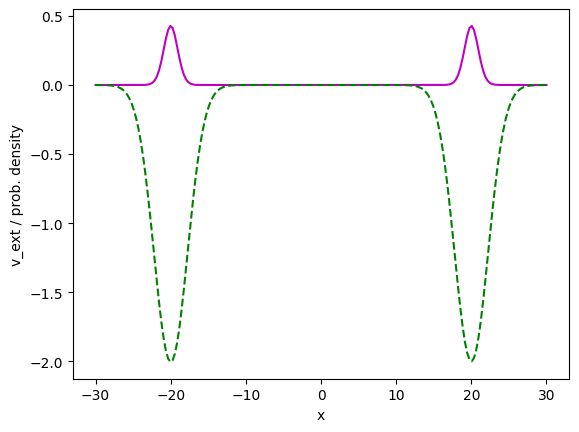

In [6]:
#plot ground state
plt.plot(system1.x, idea.observables.density(system1, state=system1_groundstate), "m-", label="Prob. Density")
plt.plot(system1.x, v_ext, "g--", label="Potential")
plt.xlabel("x")
plt.ylabel("v_ext / prob. density")
plt.show()

In [7]:
#solve for first excited state
system1_firststate = idea.methods.interacting.solve(system1, k=1)
print("done")

iDEA.methods.interacting.solve: solving eigenproblem...
done


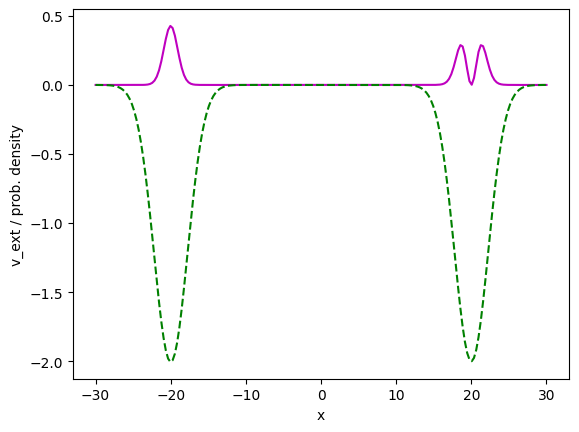

In [8]:
#plot first state
plt.plot(system1.x, idea.observables.density(system1, state=system1_firststate), "m-", label="Prob. Density")
plt.plot(system1.x, v_ext, "g--", label="Potential")
plt.xlabel("x")
plt.ylabel("v_ext / prob. density")
plt.show()

Now, decrease the distance between the wells 

In [22]:
#define initial distances & observables
import time
distances = np.linspace(20,5,61)
distances = np.append(distances, np.linspace(4.9,0,99))
distances = np.append(distances, np.zeros(5))
energies = []

start = time.time()

#loop over all distances
for i in range(0,len(distances)):

    #define potential
    v_ext_variable = -2*np.exp(-((x-distances[i])**2)/10) - 2.005*np.exp(-((x+distances[i])**2)/10)

    #solve systems
    system = idea.system.System(x, v_ext_variable, v_int, electrons="uu")
    system_firststate = idea.methods.interacting.solve(system, k=1)
    print(round(((i+1)/len(distances))*100,2), "% done")

    #add observables to list
    charge_density = idea.observables.density(system, state=system_firststate)
    hartree_potential = idea.observables.hartree_potential(system, charge_density)
    energies.append(idea.observables.hartree_energy(system, charge_density, hartree_potential))
    print(idea.observables.hartree_energy(system, charge_density, hartree_potential))
    
    #create and save plots
    plt.plot(system1.x, charge_density, "m-", label="Prob. Density")
    plt.plot(system1.x, v_ext_variable, "g--", label="Potential")
    plt.xlabel("x")
    plt.ylabel("v_ext / prob. density")
    plt.ylim(-2,0.75)
    plt.legend()
    plt.savefig(f"{str(i).zfill(3)}.png")
    plt.close()

end = time.time()
print("Done in ",end-start, "seconds")

iDEA.methods.interacting.solve: solving eigenproblem...
0.61 % done
0.5245874978697893
iDEA.methods.interacting.solve: solving eigenproblem...
1.21 % done
0.5248813586474745
iDEA.methods.interacting.solve: solving eigenproblem...
1.82 % done
0.5251820047428308
iDEA.methods.interacting.solve: solving eigenproblem...
2.42 % done
0.5254896405201316
iDEA.methods.interacting.solve: solving eigenproblem...
3.03 % done
0.5258044751853804
iDEA.methods.interacting.solve: solving eigenproblem...
3.64 % done
0.5261267224309824
iDEA.methods.interacting.solve: solving eigenproblem...
4.24 % done
0.5264565999746348
iDEA.methods.interacting.solve: solving eigenproblem...
4.85 % done
0.5267943289633366
iDEA.methods.interacting.solve: solving eigenproblem...
5.45 % done
0.5271401332213888
iDEA.methods.interacting.solve: solving eigenproblem...
6.06 % done
0.5274942383091925
iDEA.methods.interacting.solve: solving eigenproblem...
6.67 % done
0.527856870355491
iDEA.methods.interacting.solve: solving eige

In [25]:
#Create gif from saved plots
import glob
import contextlib
from PIL import Image

# filepaths
fp_in = "*.png"
fp_out = "image.gif"

# use exit stack to automatically close opened images
with contextlib.ExitStack() as stack:

    # lazily load images
    imgs = (stack.enter_context(Image.open(f))
            for f in sorted(glob.glob(fp_in)))

    # extract  first image from iterator
    img = next(imgs)

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=100, loop=0)
print("done")

done


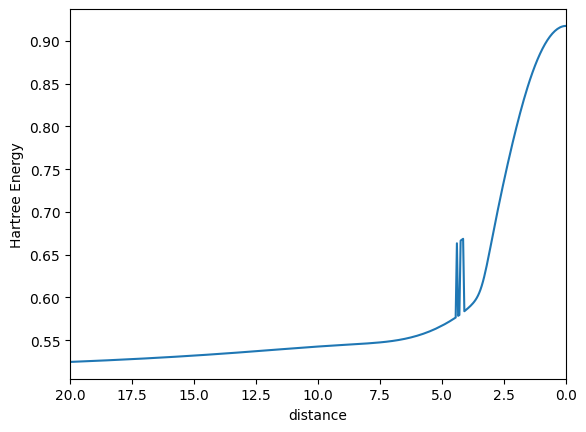

In [26]:
plt.plot(distances, energies)
plt.xlabel("distance")
plt.ylabel("Hartree Energy")
plt.xlim(20,0)
plt.show()